<h1>پروژه شبکه های عصبی</h1>
<h3></h3>

Importing the essential libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad
from tensorflow.keras.callbacks import EarlyStopping

Load and Pre-process the data

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


Effect of Number of Layers on Loss

In [ ]:
def build_model(num_layers):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(num_layers):
        model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def plot_effect_of_layers(x_train, y_train, x_test, y_test, max_layers=5, epochs=10):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for layers in range(1, max_layers + 1):
        model = build_model(layers)
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test), verbose=0)

        train_loss = history.history['loss'][-1]
        val_loss = history.history['val_loss'][-1]
        train_accuracy = history.history['accuracy'][-1]
        val_accuracy = history.history['val_accuracy'][-1]

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'{layers} layers: Train Loss={train_loss}, Validation Loss={val_loss}, Train Accuracy={train_accuracy}, Validation Accuracy={val_accuracy}')

    layers_range = range(1, max_layers + 1)

    plt.figure(figsize=(12, 5))

    # Plotting loss
    plt.subplot(1, 2, 1)
    plt.plot(layers_range, train_losses, marker='o', label='Train Loss')
    plt.plot(layers_range, val_losses, marker='o', label='Validation Loss')
    plt.title('Effect of Number of Layers on Loss')
    plt.xlabel('Number of Layers')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# You will need to call this function with your dataset
# plot_effect_of_layers(x_train, y_train, x_test, y_test, max_layers=5, epochs=10)


1 layers: Train Loss=0.015119167044758797, Validation Loss=0.08574823290109634, Train Accuracy=0.9953666925430298, Validation Accuracy=0.9781000018119812
2 layers: Train Loss=0.01909925602376461, Validation Loss=0.10268596559762955, Train Accuracy=0.9937499761581421, Validation Accuracy=0.9769999980926514
3 layers: Train Loss=0.023022549226880074, Validation Loss=0.10111825913190842, Train Accuracy=0.9924333095550537, Validation Accuracy=0.9764000177383423
4 layers: Train Loss=0.028372325003147125, Validation Loss=0.09041539579629898, Train Accuracy=0.9915000200271606, Validation Accuracy=0.9775999784469604
5 layers: Train Loss=0.030868522822856903, Validation Loss=0.0853969007730484, Train Accuracy=0.9908833503723145, Validation Accuracy=0.9799000024795532


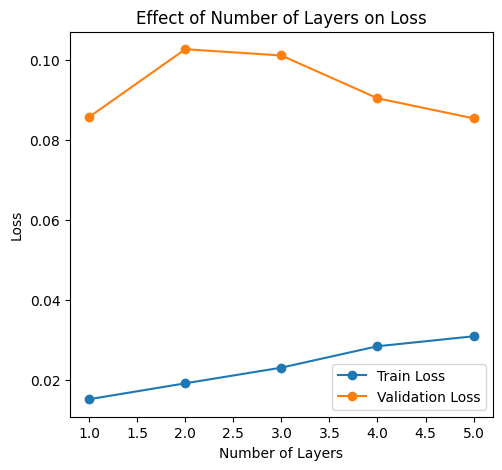

In [ ]:
plot_effect_of_layers(x_train, y_train, x_test, y_test, max_layers=5, epochs=10)

Effect of Number of Neurons on Loss

32 neurons: Train Loss=0.06257958710193634, Validation Loss=0.11678308248519897, Train Accuracy=0.9805999994277954, Validation Accuracy=0.9670000076293945
64 neurons: Train Loss=0.029130347073078156, Validation Loss=0.09868775308132172, Train Accuracy=0.9903833270072937, Validation Accuracy=0.9739000201225281
128 neurons: Train Loss=0.019336340948939323, Validation Loss=0.09754898399114609, Train Accuracy=0.9935333132743835, Validation Accuracy=0.9768000245094299
256 neurons: Train Loss=0.0174659863114357, Validation Loss=0.08795411139726639, Train Accuracy=0.9940333366394043, Validation Accuracy=0.9817000031471252
512 neurons: Train Loss=0.018125806003808975, Validation Loss=0.09536488354206085, Train Accuracy=0.9944000244140625, Validation Accuracy=0.9812999963760376


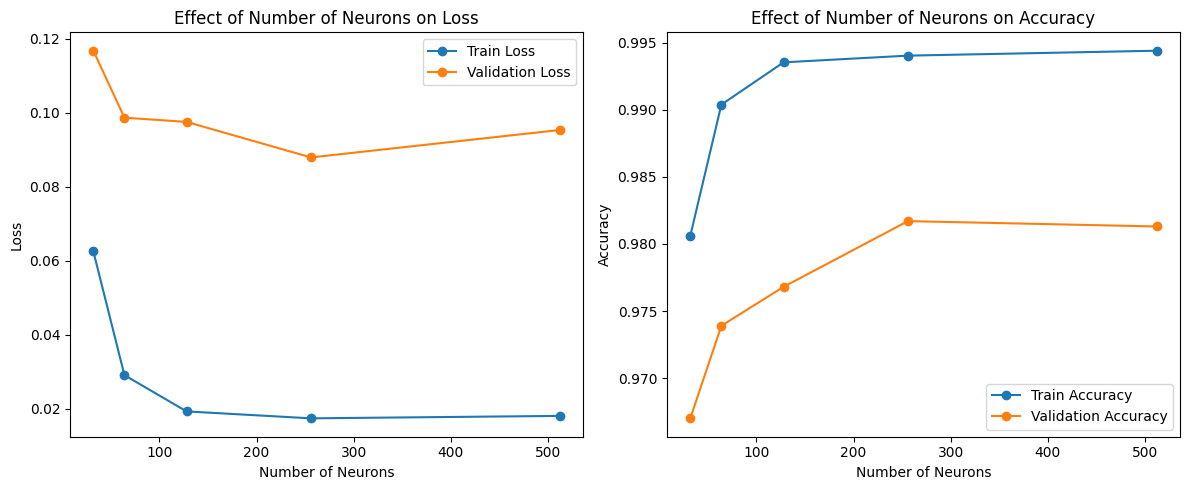

In [ ]:
def build_model(num_layers, num_neurons):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def plot_effect_of_neurons(x_train, y_train, x_test, y_test, neurons_list, num_layers=2, epochs=10):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for neurons in neurons_list:
        model = build_model(num_layers, neurons)
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test), verbose=0)

        train_loss = history.history['loss'][-1]
        val_loss = history.history['val_loss'][-1]
        train_accuracy = history.history['accuracy'][-1]
        val_accuracy = history.history['val_accuracy'][-1]

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'{neurons} neurons: Train Loss={train_loss}, Validation Loss={val_loss}, Train Accuracy={train_accuracy}, Validation Accuracy={val_accuracy}')

    plt.figure(figsize=(12, 5))

    # Plotting loss
    plt.subplot(1, 2, 1)
    plt.plot(neurons_list, train_losses, marker='o', label='Train Loss')
    plt.plot(neurons_list, val_losses, marker='o', label='Validation Loss')
    plt.title('Effect of Number of Neurons on Loss')
    plt.xlabel('Number of Neurons')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(neurons_list, train_accuracies, marker='o', label='Train Accuracy')
    plt.plot(neurons_list, val_accuracies, marker='o', label='Validation Accuracy')
    plt.title('Effect of Number of Neurons on Accuracy')
    plt.xlabel('Number of Neurons')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the list of different numbers of neurons to test
neurons_list = [32, 64, 128, 256, 512]

# Call the function to plot the effect of the number of neurons
plot_effect_of_neurons(x_train, y_train, x_test, y_test, neurons_list, num_layers=2, epochs=10)


Optimization algorithm

Adam: Train Loss=0.022615576162934303, Validation Loss=0.08961154520511627, Train Accuracy=0.9927166700363159, Validation Accuracy=0.9810000061988831
RMSProp: Train Loss=0.03614388033747673, Validation Loss=0.16108690202236176, Train Accuracy=0.9907333254814148, Validation Accuracy=0.9735999703407288
AdaGrad: Train Loss=0.25780269503593445, Validation Loss=0.2467789351940155, Train Accuracy=0.927133321762085, Validation Accuracy=0.9309999942779541


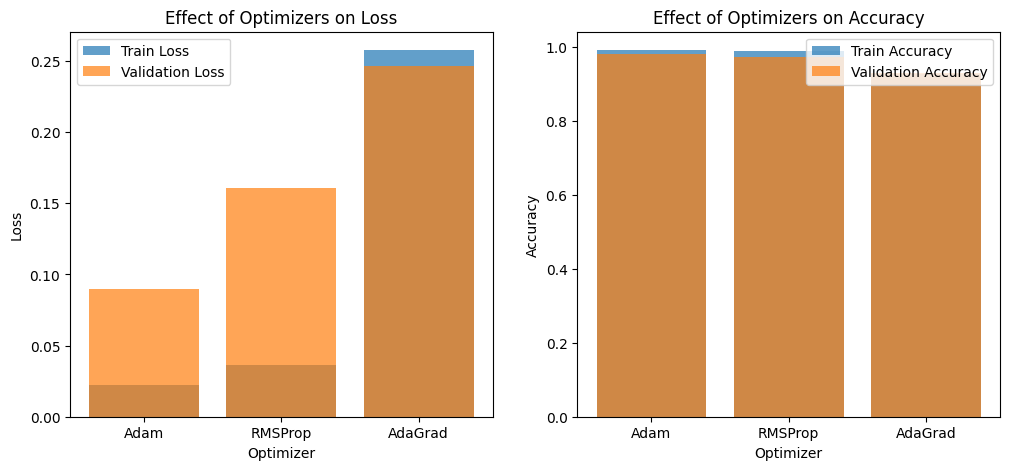

In [ ]:
def build_model(num_layers, optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(num_layers):
        model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_effect_of_optimizers(x_train, y_train, x_test, y_test, num_layers=3, epochs=10):
    optimizers = {'Adam': Adam(), 'RMSProp': RMSprop(), 'AdaGrad': Adagrad()}
    results = {}

    for opt_name, optimizer in optimizers.items():
        model = build_model(num_layers, optimizer)
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test), verbose=0)
        train_loss = history.history['loss'][-1]
        val_loss = history.history['val_loss'][-1]
        train_accuracy = history.history['accuracy'][-1]
        val_accuracy = history.history['val_accuracy'][-1]

        results[opt_name] = {'train_loss': train_loss, 'val_loss': val_loss, 'train_accuracy': train_accuracy, 'val_accuracy': val_accuracy}

        print(f'{opt_name}: Train Loss={train_loss}, Validation Loss={val_loss}, Train Accuracy={train_accuracy}, Validation Accuracy={val_accuracy}')

    return results

def plot_results(results):
    optimizers = list(results.keys())
    train_losses = [results[opt]['train_loss'] for opt in optimizers]
    val_losses = [results[opt]['val_loss'] for opt in optimizers]
    train_accuracies = [results[opt]['train_accuracy'] for opt in optimizers]
    val_accuracies = [results[opt]['val_accuracy'] for opt in optimizers]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.bar(optimizers, train_losses, alpha=0.7, label='Train Loss')
    plt.bar(optimizers, val_losses, alpha=0.7, label='Validation Loss')
    plt.title('Effect of Optimizers on Loss')
    plt.xlabel('Optimizer')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.bar(optimizers, train_accuracies, alpha=0.7, label='Train Accuracy')
    plt.bar(optimizers, val_accuracies, alpha=0.7, label='Validation Accuracy')
    plt.title('Effect of Optimizers on Accuracy')
    plt.xlabel('Optimizer')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

results = plot_effect_of_optimizers(x_train, y_train, x_test, y_test, num_layers=3, epochs=10)
plot_results(results)



Learning Algorithm

Model 1 Test accuracy: 0.6894000172615051
Model 2 Test accuracy: 0.9775000214576721


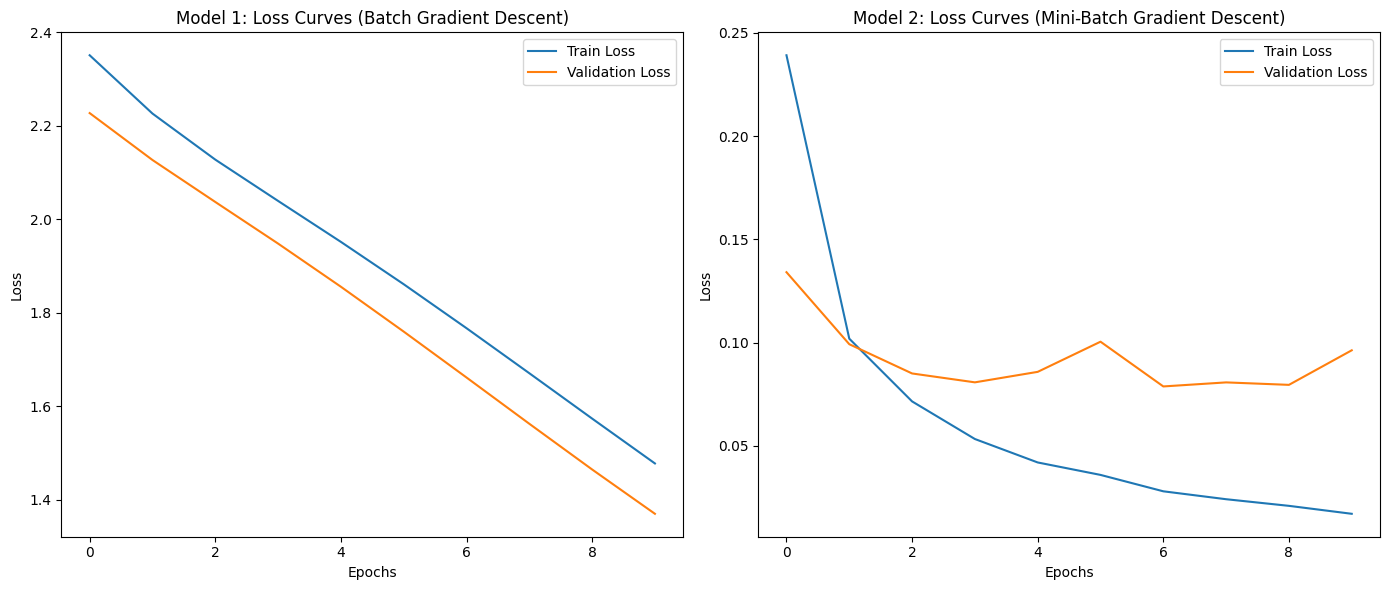

In [ ]:
def train_model_1(x_train, y_train, x_test, y_test, epochs=10):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=60000, validation_data=(x_test, y_test), verbose=0)

    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'Model 1 Test accuracy: {test_accuracy}')

    return history

def train_model_2(x_train, y_train, x_test, y_test, epochs=10):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test), verbose=0)

    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'Model 2 Test accuracy: {test_accuracy}')

    return history
def plot_loss_curves(history1, history2):
    plt.figure(figsize=(14, 6))

    # Plot training and validation loss for Model 1
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['loss'], label='Train Loss')
    plt.plot(history1.history['val_loss'], label='Validation Loss')
    plt.title('Model 1: Loss Curves (Batch Gradient Descent)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation loss for Model 2
    plt.subplot(1, 2, 2)
    plt.plot(history2.history['loss'], label='Train Loss')
    plt.plot(history2.history['val_loss'], label='Validation Loss')
    plt.title('Model 2: Loss Curves (Mini-Batch Gradient Descent)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

history1 = train_model_1(x_train, y_train, x_test, y_test, epochs=10)
history2 = train_model_2(x_train, y_train, x_test, y_test, epochs=10)

plot_loss_curves(history1, history2)

Learning rate

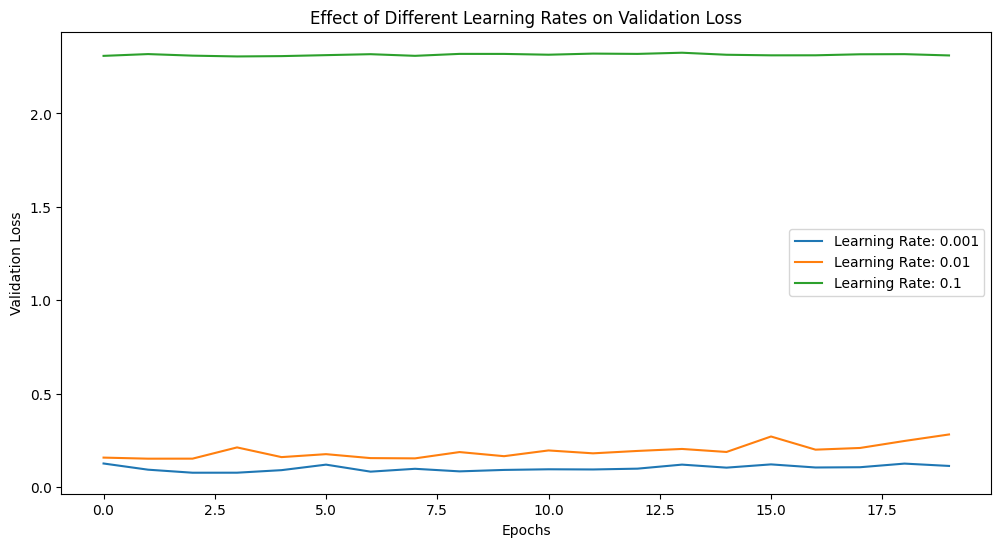

In [ ]:
def train_model_with_lr(x_train, y_train, x_test, y_test, learning_rate, epochs=20):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=32,
                        validation_data=(x_test, y_test), verbose=0)
    return history

learning_rates = [0.001, 0.01, 0.1]

def plot_loss_curves_for_lr(learning_rates, histories):
    plt.figure(figsize=(12, 6))
    for i, lr in enumerate(learning_rates):
        plt.plot(histories[i].history['val_loss'], label=f'Learning Rate: {lr}')
    plt.title('Effect of Different Learning Rates on Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.show()

histories = []
for lr in learning_rates:
    history = train_model_with_lr(x_train, y_train, x_test, y_test, learning_rate=lr, epochs=20)
    histories.append(history)

plot_loss_curves_for_lr(learning_rates, histories)

Overfitting and Underfitting

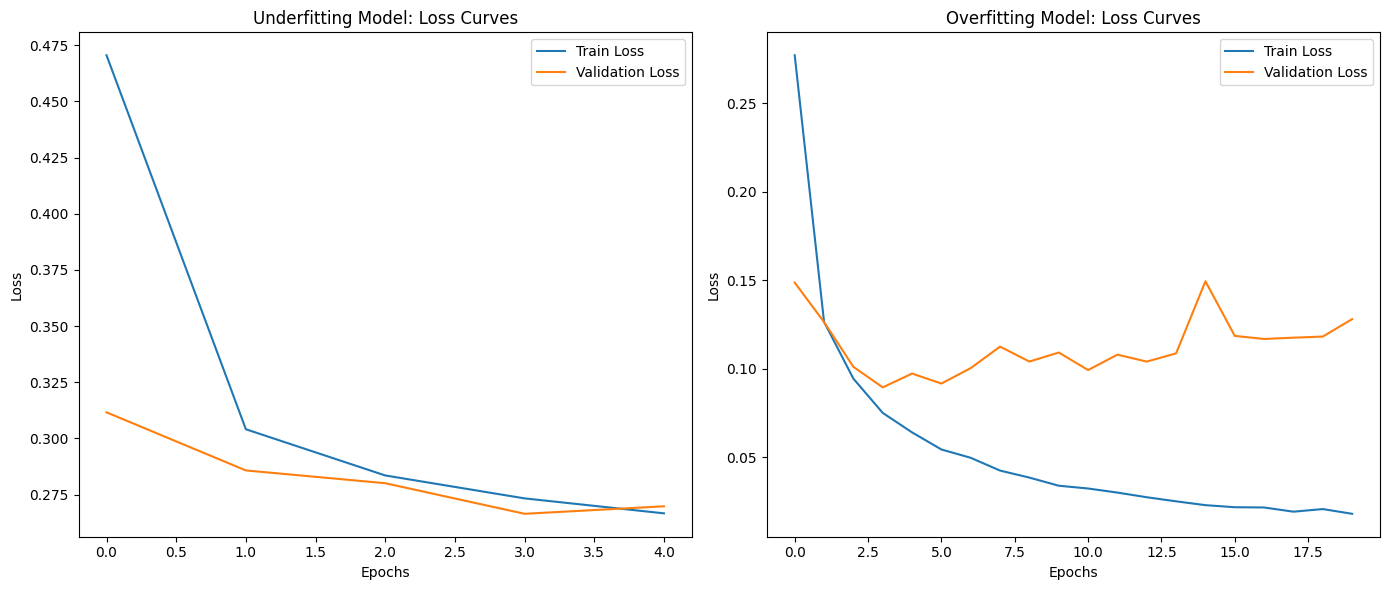

In [ ]:
# Define and train the underfitting model
def train_underfitting_model(x_train, y_train, x_test, y_test, epochs=5):
    model_underfitting = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(10, activation='softmax')
    ])
    model_underfitting.compile(optimizer='adam',
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])
    history_underfitting = model_underfitting.fit(x_train, y_train, epochs=epochs, batch_size=32,
                                                  validation_data=(x_test, y_test), verbose=0)
    return history_underfitting

# Define and train the overfitting model
def train_overfitting_model(x_train, y_train, x_test, y_test, epochs=20):
    model_overfitting = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation='relu'),  # More neurons and layers
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model_overfitting.compile(optimizer='adam',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])
    history_overfitting = model_overfitting.fit(x_train, y_train, epochs=epochs, batch_size=32,
                                                validation_data=(x_test, y_test), verbose=0)
    return history_overfitting

# Plot the loss curves for comparison
def plot_loss_curves(history_underfitting, history_overfitting):
    plt.figure(figsize=(14, 6))

    # Plot training and validation loss for underfitting model
    plt.subplot(1, 2, 1)
    plt.plot(history_underfitting.history['loss'], label='Train Loss')
    plt.plot(history_underfitting.history['val_loss'], label='Validation Loss')
    plt.title('Underfitting Model: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation loss for overfitting model
    plt.subplot(1, 2, 2)
    plt.plot(history_overfitting.history['loss'], label='Train Loss')
    plt.plot(history_overfitting.history['val_loss'], label='Validation Loss')
    plt.title('Overfitting Model: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train the models
history_underfitting = train_underfitting_model(x_train, y_train, x_test, y_test, epochs=5)
history_overfitting = train_overfitting_model(x_train, y_train, x_test, y_test, epochs=20)

# Plot the loss curves
plot_loss_curves(history_underfitting, history_overfitting)


Stopping Criteria

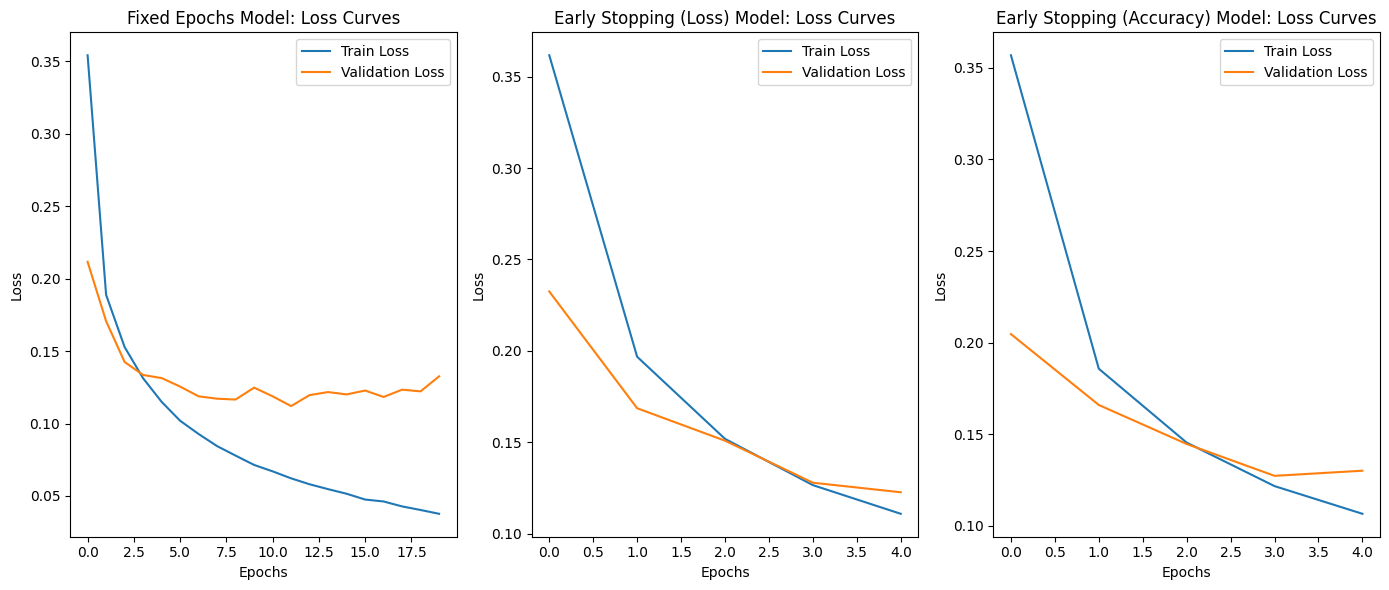

In [ ]:
def train_fixed_epochs_model(x_train, y_train, x_test, y_test, epochs=5):
    model_fixed = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model_fixed.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_fixed = model_fixed.fit(x_train, y_train, epochs=epochs, batch_size=32,
                                    validation_data=(x_test, y_test), verbose=0)
    return history_fixed

def train_early_stopping_loss_model(x_train, y_train, x_test, y_test, patience=3):
    model_loss = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model_loss.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping_loss = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    history_loss = model_loss.fit(x_train, y_train, epochs=5, batch_size=32,
                                  validation_data=(x_test, y_test), verbose=0,
                                  callbacks=[early_stopping_loss])
    return history_loss

def train_early_stopping_accuracy_model(x_train, y_train, x_test, y_test, patience=3):
    model_accuracy = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model_accuracy.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping_accuracy = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
    history_accuracy = model_accuracy.fit(x_train, y_train, epochs=5, batch_size=32,
                                          validation_data=(x_test, y_test), verbose=0,
                                          callbacks=[early_stopping_accuracy])
    return history_accuracy

def plot_loss_curves(history_fixed, history_loss, history_accuracy):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 3, 1)
    plt.plot(history_fixed.history['loss'], label='Train Loss')
    plt.plot(history_fixed.history['val_loss'], label='Validation Loss')
    plt.title('Fixed Epochs Model: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history_loss.history['loss'], label='Train Loss')
    plt.plot(history_loss.history['val_loss'], label='Validation Loss')
    plt.title('Early Stopping (Loss) Model: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history_accuracy.history['loss'], label='Train Loss')
    plt.plot(history_accuracy.history['val_loss'], label='Validation Loss')
    plt.title('Early Stopping (Accuracy) Model: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

history_fixed = train_fixed_epochs_model(x_train, y_train, x_test, y_test, epochs=20)
history_loss = train_early_stopping_loss_model(x_train, y_train, x_test, y_test, patience=3)
history_accuracy = train_early_stopping_accuracy_model(x_train, y_train, x_test, y_test, patience=3)

plot_loss_curves(history_fixed, history_loss, history_accuracy)

Actiovation Function

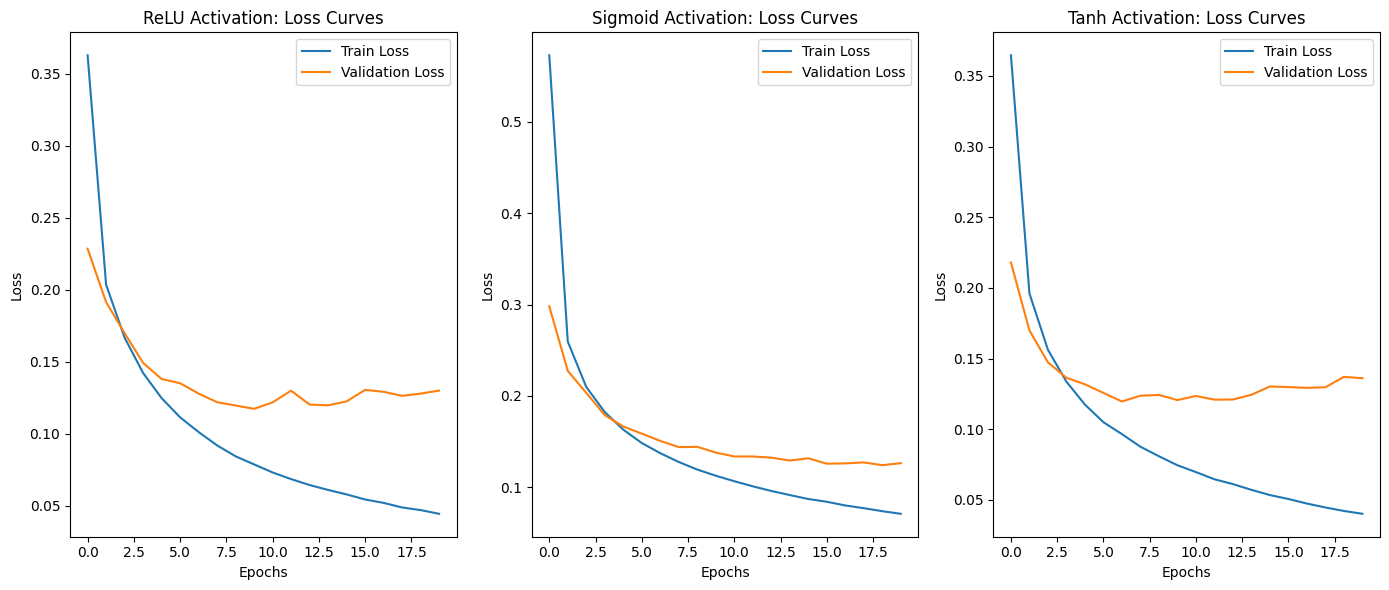

In [ ]:
def train_relu_model(x_train, y_train, x_test, y_test, epochs=5):
    model_relu = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model_relu.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
    history_relu = model_relu.fit(x_train, y_train, epochs=epochs, batch_size=32,
                                  validation_data=(x_test, y_test), verbose=0)
    return history_relu

def train_sigmoid_model(x_train, y_train, x_test, y_test, epochs=5):
    model_sigmoid = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(32, activation='sigmoid'),
        Dense(10, activation='softmax')
    ])
    model_sigmoid.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
    history_sigmoid = model_sigmoid.fit(x_train, y_train, epochs=epochs, batch_size=32,
                                        validation_data=(x_test, y_test), verbose=0)
    return history_sigmoid

def train_tanh_model(x_train, y_train, x_test, y_test, epochs=5):
    model_tanh = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(32, activation='tanh'),
        Dense(10, activation='softmax')
    ])
    model_tanh.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
    history_tanh = model_tanh.fit(x_train, y_train, epochs=epochs, batch_size=32,
                                  validation_data=(x_test, y_test), verbose=0)
    return history_tanh

def plot_loss_curves(history_relu, history_sigmoid, history_tanh):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 3, 1)
    plt.plot(history_relu.history['loss'], label='Train Loss')
    plt.plot(history_relu.history['val_loss'], label='Validation Loss')
    plt.title('ReLU Activation: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history_sigmoid.history['loss'], label='Train Loss')
    plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss')
    plt.title('Sigmoid Activation: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history_tanh.history['loss'], label='Train Loss')
    plt.plot(history_tanh.history['val_loss'], label='Validation Loss')
    plt.title('Tanh Activation: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

history_relu = train_relu_model(x_train, y_train, x_test, y_test, epochs=20)
history_sigmoid = train_sigmoid_model(x_train, y_train, x_test, y_test, epochs=20)
history_tanh = train_tanh_model(x_train, y_train, x_test, y_test, epochs=20)

plot_loss_curves(history_relu, history_sigmoid, history_tanh)


Dropout

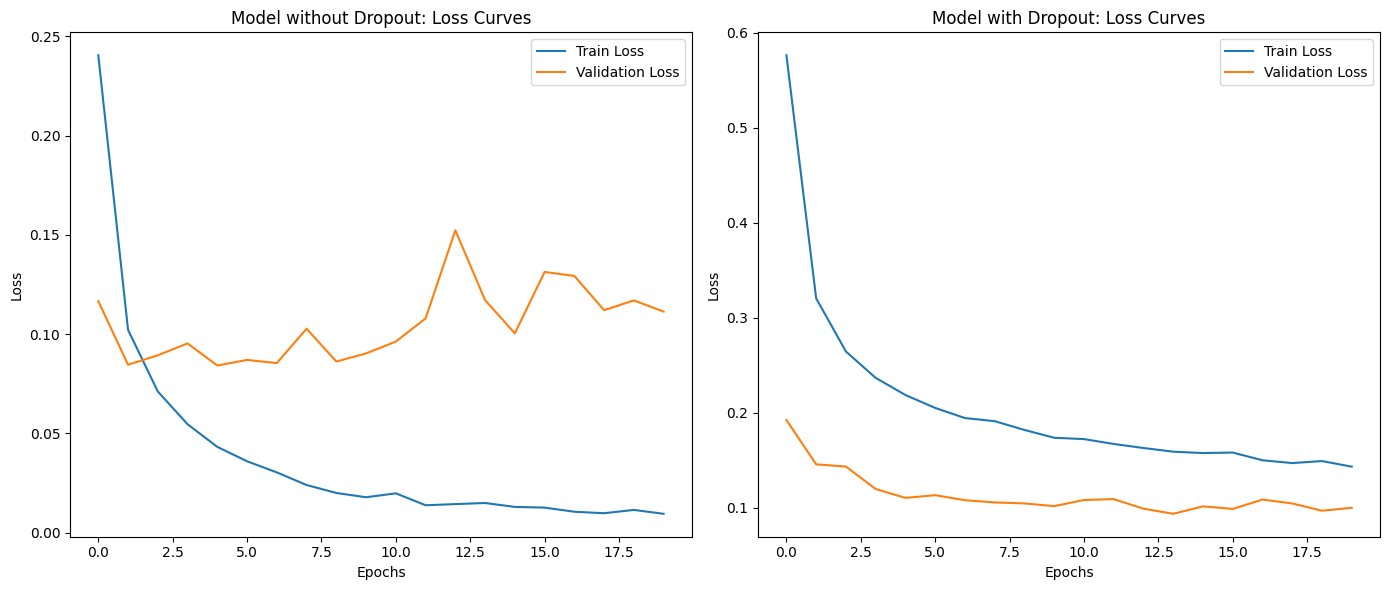

In [ ]:
def train_no_dropout_model(x_train, y_train, x_test, y_test, epochs=20):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=32,
                        validation_data=(x_test, y_test), verbose=0)
    return history

def train_dropout_model(x_train, y_train, x_test, y_test, epochs=20):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=32,
                        validation_data=(x_test, y_test), verbose=0)
    return history

def plot_loss_curves(history_no_dropout, history_dropout):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_no_dropout.history['loss'], label='Train Loss')
    plt.plot(history_no_dropout.history['val_loss'], label='Validation Loss')
    plt.title('Model without Dropout: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_dropout.history['loss'], label='Train Loss')
    plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
    plt.title('Model with Dropout: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

history_no_dropout = train_no_dropout_model(x_train, y_train, x_test, y_test, epochs=20)
history_dropout = train_dropout_model(x_train, y_train, x_test, y_test, epochs=20)

plot_loss_curves(history_no_dropout, history_dropout)

Batch Normalization

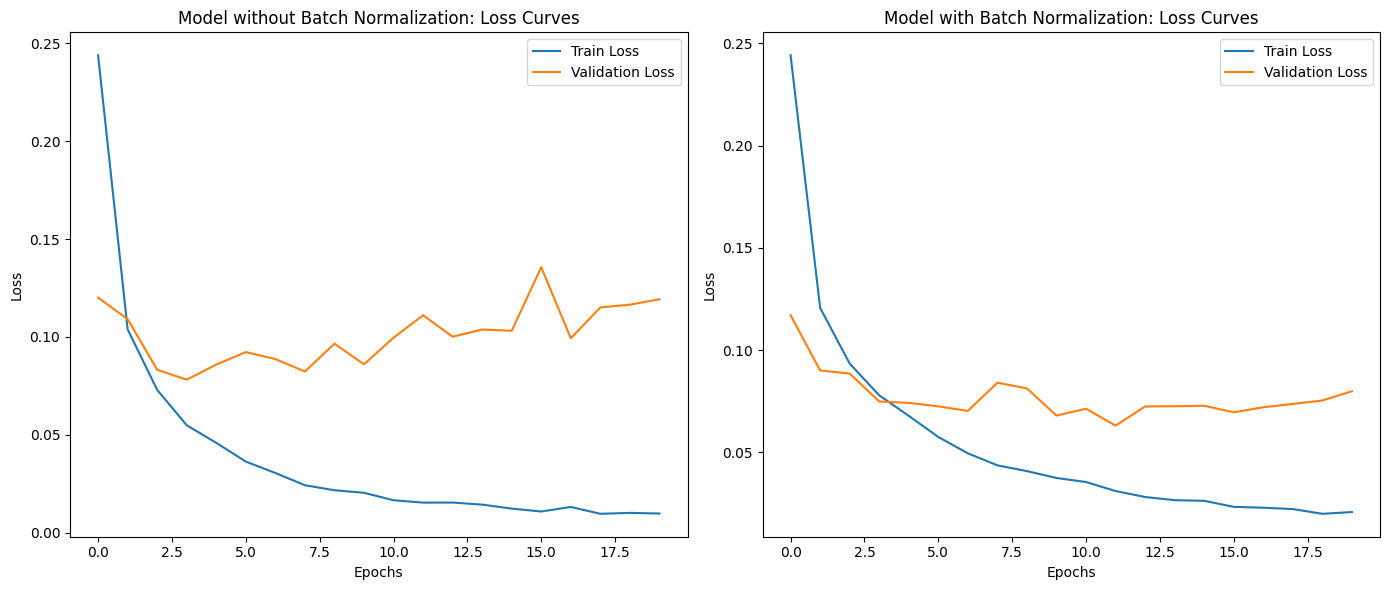

In [ ]:
def train_no_batch_norm_model(x_train, y_train, x_test, y_test, epochs=20):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=32,
                        validation_data=(x_test, y_test), verbose=0)
    return history

def train_batch_norm_model(x_train, y_train, x_test, y_test, epochs=20):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=32,
                        validation_data=(x_test, y_test), verbose=0)
    return history

def plot_loss_curves(history_no_batch_norm, history_batch_norm):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_no_batch_norm.history['loss'], label='Train Loss')
    plt.plot(history_no_batch_norm.history['val_loss'], label='Validation Loss')
    plt.title('Model without Batch Normalization: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_batch_norm.history['loss'], label='Train Loss')
    plt.plot(history_batch_norm.history['val_loss'], label='Validation Loss')
    plt.title('Model with Batch Normalization: Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

history_no_batch_norm = train_no_batch_norm_model(x_train, y_train, x_test, y_test, epochs=20)
history_batch_norm = train_batch_norm_model(x_train, y_train, x_test, y_test, epochs=20)

plot_loss_curves(history_no_batch_norm, history_batch_norm)
